Switch to TPU-4 before running

In [ ]:
pip install ipywidgets matplotlib pillow tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import requests
from io import BytesIO
from PIL import Image as PILImage, UnidentifiedImageError
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tkinter import Button

In [ ]:
# Create text boxes for image URLs
url_textbox1 = widgets.Text(
    value='',
    placeholder='Enter the URL of the content image',
    description='Content Image URL:',
    disabled=False
)

url_textbox2 = widgets.Text(
    value='',
    placeholder='Enter the URL of the style image',
    description='Style Image URL:',
    disabled=False
)

# Create a button to trigger image display
display_button = widgets.Button(
    description='Finalize Images',
    disabled=False,
    button_style='',
    tooltip='Click to finalize images',
    icon='picture-o' # (FontAwesome names without the `fa-` prefix)
)



In [ ]:
import requests
from io import BytesIO
from PIL import Image as PILImage, UnidentifiedImageError
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output

# Create text boxes and buttons
url_textbox1 = widgets.Text(
    value='',
    placeholder='Enter the URL of the Content image',
    description='Content Image URL:',
    layout=widgets.Layout(width='50%')
)

url_textbox2 = widgets.Text(
    placeholder='Enter the URL of the Style image',
    description='Style Image URL:',
    layout=widgets.Layout(width='50%')
)

display_button = widgets.Button(description="Display Images")
finalize_button = widgets.Button(description="Finalize")

def display_images(img_url1, img_url2):
    try:
        response1 = requests.get(img_url1)
        response2 = requests.get(img_url2)

# Ensure both requests were successful
        response1.raise_for_status()
        response2.raise_for_status()

# Open the images with Pillow
        img1 = PILImage.open(BytesIO(response1.content))
        img2 = PILImage.open(BytesIO(response2.content))

# Convert images to RGB if they are not
        if img1.mode != 'RGB':
            img1 = img1.convert('RGB')
        if img2.mode != 'RGB':
            img2 = img2.convert('RGB')

# Plot the images using matplotlib
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img1)
        axs[0].axis('off')
        # Hide axes
        axs[0].set_title('Content Image')

        axs[1].imshow(img2)
        axs[1].axis('off')
        # Hide axes
        axs[1].set_title('Style Image')

        plt.show()

    except requests.exceptions.RequestException as e:
        print(f"Error fetching one of the images: {e}")
    except UnidentifiedImageError as e:
        print(f"Error identifying one of the images: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Define what happens when the display button is clicked
def on_display_button_click(b):
    if not url_textbox1.value or not url_textbox2.value:
         print("Both URLs must be provided.")
    else:
        clear_output(wait=True)
        display(url_textbox1, url_textbox2, display_button, finalize_button)
        display_images(url_textbox1.value, url_textbox2.value)

# Define what happens when the finalize button is clicked
def on_finalize_button_click(b):
    if not url_textbox1.value or not url_textbox2.value:
        print("Both URLs must be provided.")
    else:
        clear_output(wait=True)
        display(url_textbox1, url_textbox2, display_button, finalize_button)
        print("Finalized. You can now proceed with the next steps.")
# Include any further steps here

display_button.on_click(on_display_button_click)
finalize_button.on_click(on_finalize_button_click)

# Display the widgets
display(url_textbox1, url_textbox2, display_button, finalize_button)

# https://th.bing.com/th?id=OIP.PT1WO-SwopebduBu_LIlAgAAAA&w=220&h=283&c=8&rs=1&qlt=90&o=6&dpr=1.3&pid=3.1&rm=2
# https://th.bing.com/th?id=OIP.ymI23uiCQHLIFbswhRGpywHaKk&w=209&h=298&c=8&rs=1&qlt=90&o=6&pid=3.1&rm=2


Text(value='https://th.bing.com/th?id=OIP.PT1WO-SwopebduBu_LIlAgAAAA&w=220&h=283&c=8&rs=1&qlt=90&o=6&dpr=1.3&p…

Text(value='https://th.bing.com/th?id=OIP.ymI23uiCQHLIFbswhRGpywHaKk&w=209&h=298&c=8&rs=1&qlt=90&o=6&pid=3.1&r…

Button(description='Display Images', style=ButtonStyle())

Button(description='Finalize', style=ButtonStyle())

Finalized. You can now proceed with the next steps.


In [ ]:
# Load and preprocess images
def load_and_process_img(img_link):
    response = requests.get(img_link)
    img = Image.open(BytesIO(response.content))
    img = img.resize((400, 400))
    img = kp_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

def deprocess_img(processed_img):
    x = processed_img.copy()
    if len(x.shape) == 4:
        x = np.squeeze(x, 0)
    assert len(x.shape) == 3, ("Input to deprocessing image must be an image of "
                               "dimension [1, height, width, channel] or [height, width, channel]")

    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [ ]:
from PIL import Image
print (url_textbox1.value)
print (url_textbox2.value)
# Load images
content_link = url_textbox1.value
style_link = url_textbox2.value

content_image = load_and_process_img(content_link)
style_image = load_and_process_img(style_link)

https://th.bing.com/th?id=OIP.PT1WO-SwopebduBu_LIlAgAAAA&w=220&h=283&c=8&rs=1&qlt=90&o=6&dpr=1.3&pid=3.1&rm=2 # https://th.bing.com/th?id=OIP.ymI23uiCQHLIFbswhRGpywHaKk&w=209&h=298&c=8&rs=1&qlt=90&o=6&pid=3.1&rm=2
https://th.bing.com/th?id=OIP.ymI23uiCQHLIFbswhRGpywHaKk&w=209&h=298&c=8&rs=1&qlt=90&o=6&pid=3.1&rm=2


In [ ]:
# Define content and style layers
content_layers = ['block5_conv2']
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [ ]:
# Build the model
def get_model():
    vgg = VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    content_output = [vgg.get_layer(name).output for name in content_layers]
    style_output = [vgg.get_layer(name).output for name in style_layers]
    model_outputs = content_output + style_output

    return Model(vgg.input, model_outputs)

In [ ]:
# Compute loss
def get_content_loss(base_content, target):
    return tf.reduce_mean(tf.square(base_content - target))

def gram_matrix(input_tensor):
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
    height, width, channels = base_style.get_shape().as_list()
    gram_style = gram_matrix(base_style)

    return tf.reduce_mean(tf.square(gram_style - gram_target))

def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
    model_outputs = model(init_image)

    style_output_features = model_outputs[num_content_layers:]
    content_output_features = model_outputs[:num_content_layers]

    style_score = 0
    content_score = 0

    weight_content, weight_style = loss_weights

    for target_style, comb_style in zip(gram_style_features, style_output_features):
        style_score += get_style_loss(comb_style[0], target_style)

    for target_content, comb_content in zip(content_features, content_output_features):
        content_score += get_content_loss(comb_content[0], target_content)

    style_score *= weight_style / num_style_layers
    content_score *= weight_content / num_content_layers

    loss = style_score + content_score
    return loss, style_score, content_score

In [ ]:
# Compute gradients
def compute_grads(cfg):
    with tf.GradientTape() as tape:
        all_loss = compute_loss(**cfg)
    total_loss = all_loss[0]
    return tape.gradient(total_loss, cfg['init_image']), all_loss

In [ ]:
# Extract features
def get_feature_representations(model, content_image, style_image):
    content_outputs = model(content_image)
    style_outputs = model(style_image)

    content_features = [content_layer[0] for content_layer in content_outputs[:num_content_layers]]
    style_features = [style_layer[0] for style_layer in style_outputs[num_content_layers:]]

    return content_features, style_features

model = get_model()
for layer in model.layers:
    layer.trainable = False

content_features, style_features = get_feature_representations(model, content_image, style_image)
gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]

In [ ]:
# Set initial image
init_image = np.copy(content_image)
init_image = tf.Variable(init_image, dtype=tf.float32)

# Set up optimizer
optimizer = Adam(learning_rate=5.0)

# Set up loss weights
style_weight = 1e-2
content_weight = 1e4

Epoch 1/10, Loss: 40447148.00, Style Loss: 32315736.00, Content Loss: 8131413.00
Epoch 2/10, Loss: 25261032.00, Style Loss: 17851530.00, Content Loss: 7409502.50
Epoch 3/10, Loss: 18852312.00, Style Loss: 12324536.00, Content Loss: 6527775.50
Epoch 4/10, Loss: 15161214.00, Style Loss: 9347411.00, Content Loss: 5813802.50
Epoch 5/10, Loss: 12718054.00, Style Loss: 7424293.50, Content Loss: 5293760.00
Epoch 6/10, Loss: 11002954.00, Style Loss: 6121324.50, Content Loss: 4881630.00
Epoch 7/10, Loss: 9732707.00, Style Loss: 5192971.50, Content Loss: 4539735.50
Epoch 8/10, Loss: 8772347.00, Style Loss: 4520845.00, Content Loss: 4251502.00
Epoch 9/10, Loss: 8026039.50, Style Loss: 4015047.25, Content Loss: 4010992.25
Epoch 10/10, Loss: 7436721.00, Style Loss: 3626464.75, Content Loss: 3810256.25


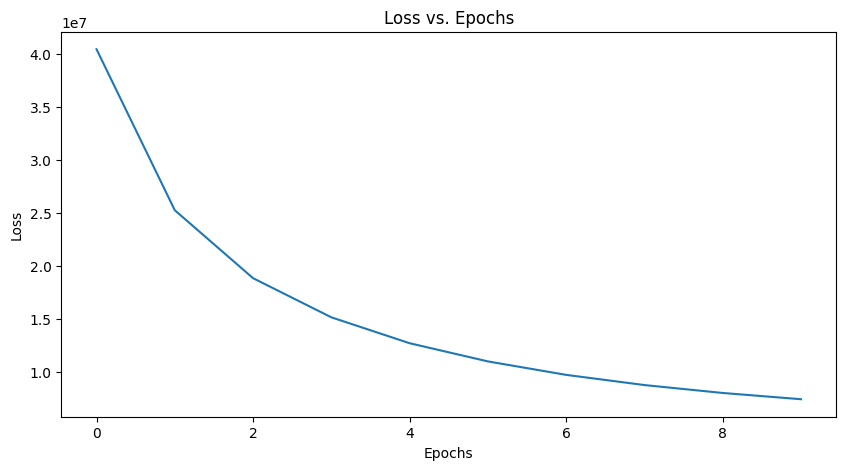

In [ ]:
# Train the model
epochs = 10
steps_per_epoch = 5

cfg = {
    'model': model,
    'loss_weights': (content_weight, style_weight),
    'init_image': init_image,
    'gram_style_features': gram_style_features,
    'content_features': content_features
}

best_loss, best_img = float('inf'), None
losses = []

for i in range(epochs):
    for j in range(steps_per_epoch):
        grads, all_loss = compute_grads(cfg)
        loss, style_score, content_score = all_loss
        optimizer.apply_gradients([(grads, init_image)])
        clipped = tf.clip_by_value(init_image, -103.939, 255 - 103.939)
        init_image.assign(clipped)

    losses.append(loss)
    if loss < best_loss:
        best_loss = loss
        best_img = deprocess_img(init_image.numpy())

    print(f"Epoch {i+1}/{epochs}, Loss: {loss:.2f}, Style Loss: {style_score:.2f}, Content Loss: {content_score:.2f}")

# Plot loss vs. epoch
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

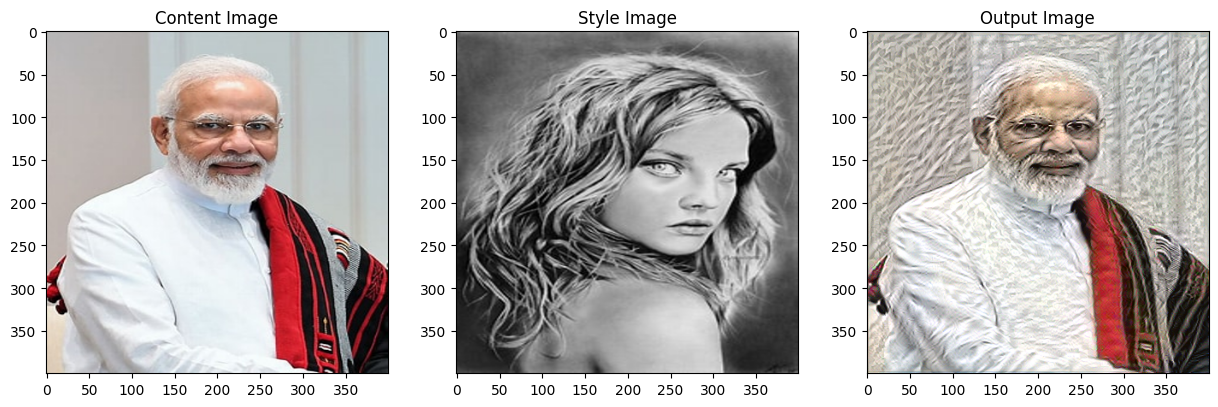

In [ ]:
# Display output image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(deprocess_img(content_image))
plt.title('Content Image')

plt.subplot(1, 3, 2)
plt.imshow(deprocess_img(style_image))
plt.title('Style Image')

plt.subplot(1, 3, 3)
plt.imshow(best_img)
plt.title('Output Image')
plt.show()

array([[[167, 175, 162],
        [156, 156, 146],
        [165, 175, 168],
        ...,
        [176, 183, 179],
        [169, 174, 152],
        [196, 208, 218]],

       [[157, 169, 160],
        [158, 156, 151],
        [173, 175, 168],
        ...,
        [179, 187, 181],
        [176, 187, 184],
        [175, 182, 163]],

       [[160, 172, 176],
        [162, 154, 147],
        [183, 183, 171],
        ...,
        [191, 176, 170],
        [178, 188, 176],
        [187, 192, 171]],

       ...,

       [[201, 188, 172],
        [179, 168, 146],
        [210, 204, 193],
        ...,
        [ 49,  53,  48],
        [ 38,  61,  53],
        [ 49,  54,  51]],

       [[169, 149, 108],
        [168, 156, 133],
        [182, 176, 150],
        ...,
        [ 64,  76,  75],
        [ 51,  76,  88],
        [ 59,  63,  74]],

       [[240, 231, 209],
        [178, 174, 146],
        [226, 227, 201],
        ...,
        [ 69,  51,  64],
        [ 53,  52,  72],
        [ 51,  60,  77]]], dtype=uint8)
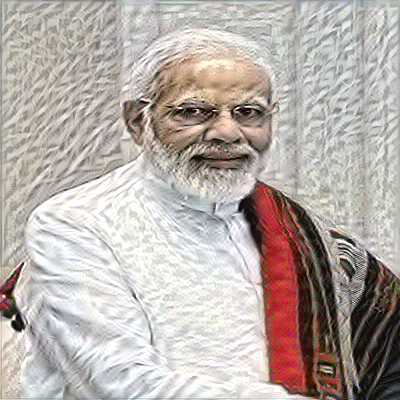

In [ ]:
best_img